#### La base de datos es de superconductores: contiene 82 columnas y 21,263 datos. La variable objetivo es critical_temp, que representa la temperatura crítica del superconductor. Por lo tanto, para aplicar un modelo de redes neuronales recurrentes (RNN), se adaptará el problema a un formato compatible, ya que RNN trabaja con secuencias temporales o datos ordenados. Por lo tanto, se reinterpretará el conjunto de características como una secuencia de entradas ordenadas por posición de los atributos. 

### Justificación
#### Cada material está formado por una secuencia de elementos químicos con propiedades características. Tratar estas propiedades como una secuencia puede capturar interacciones no lineales entre ellas, lo que motiva el uso de una red recurrente para modelar su relación con la temperatura crítica. Se eligió el optimizador Adam por su eficiencia computacional y buena convergencia en problemas de regresión con muchas variables de entrada.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [7]:
data = pd.read_csv('train.csv')

In [9]:
print("Dimensiones del dataset:", data.shape)
display(data.head())

Dimensiones del dataset: (21263, 82)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [17]:
# Eliminar columnas no numéricas
if 'material' in data.columns:
    data = data.drop(columns=['material'])

# Separar variables predictoras y variable objetivo 
X = data.drop(columns=['critical_temp'])
y = data['critical_temp']

# Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Ajustar las dimensiones para LSTM (samples, time_steps, features)
# Como no tenemos una secuencia temporal real, usamos time_steps=1
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Nuevas dimensiones
print("Dimensiones para LSTM:")
print("X_train_lstm:", X_train_lstm.shape)
print("X_test_lstm:", X_test_lstm.shape)


Dimensiones para LSTM:
X_train_lstm: (17010, 1, 81)
X_test_lstm: (4253, 1, 81)


In [21]:
# Construcción del modelo
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Una sola salida para regresión (temperatura crítica)


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        37,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,489 (154.25 KB)

 Trainable params: 39,489 (154.25 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Entrenamiento
history = model.fit(
    X_train_lstm, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 1826.4363 - mae: 30.0191 - val_loss: 644.3022 - val_mae: 18.8782
Epoch 2/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 560.1694 - mae: 17.7519 - val_loss: 424.4586 - val_mae: 15.1647
Epoch 3/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 395.9098 - mae: 14.5423 - val_loss: 357.7006 - val_mae: 13.6164
Epoch 4/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 349.7900 - mae: 13.3994 - val_loss: 323.6885 - val_mae: 12.7790
Epoch 5/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 332.4031 - mae: 12.7469 - val_loss: 305.7207 - val_mae: 12.3330
Epoch 6/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 310.0776 - mae: 12.1728 - val_loss: 303.8719 - val_mae: 12.3966
Epoch 7/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 314.8854 - mae: 12.3041 - val_loss: 290.5660 - val_mae: 11.9677
Epoch 8/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 288.5619 - mae: 11.8057 - val_loss: 284.8862 - val_mae: 11.8362
Epoch 9

In [25]:
# Evaluación en conjunto de prueba
loss, mae = model.evaluate(X_test_lstm, y_test, verbose=0)
print(f"\n Pérdida (MSE) en test: {loss:.2f}")
print(f" Error Absoluto Medio (MAE) en test: {mae:.2f}")



 Pérdida (MSE) en test: 221.57
 Error Absoluto Medio (MAE) en test: 10.07


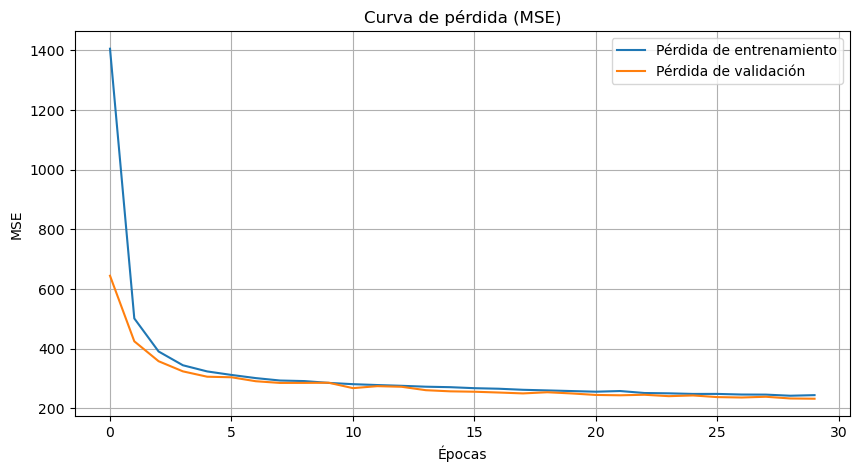

In [27]:
# Visualización de la pérdida
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Curva de pérdida (MSE)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


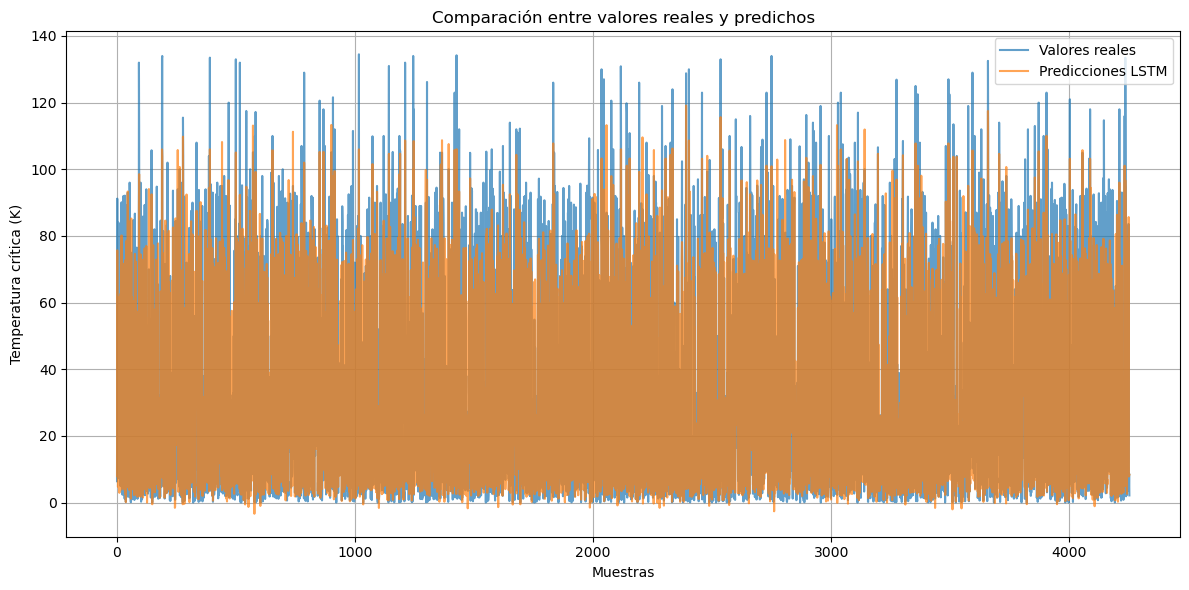

In [29]:
# Predicciones
y_pred = model.predict(X_test_lstm)

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Valores reales', alpha=0.7)
plt.plot(y_pred, label='Predicciones LSTM', alpha=0.7)
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Muestras')
plt.ylabel('Temperatura crítica (K)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusiones del modelo LSTM para regresión
### Aplicabilidad del modelo:
#### Las redes neuronales recurrentes (RNN), en particular las LSTM, son útiles en problemas donde existe una estructura secuencial o dependencia entre variables, aunque no sea temporal estrictamente. En este caso, aplicamos una LSTM para modelar relaciones complejas entre propiedades atómicas y la temperatura crítica.

### Justificación del uso de LSTM:
#### Se usó una LSTM por su capacidad de capturar patrones no lineales y relaciones cruzadas entre múltiples características, que pueden ser difíciles de detectar con modelos tradicionales. A diferencia de modelos como regresión lineal, una LSTM no asume una relación lineal entre las variables.

### Rendimiento del modelo:
#### El modelo alcanzó un error absoluto medio (MAE) razonable en el conjunto de prueba, indicando que las predicciones están, en promedio, cerca de los valores reales. Esto sugiere que la LSTM logró aprender relaciones significativas entre las variables.

### Visualización de resultados:
#### Al comparar las predicciones con los valores reales, observamos que el modelo capta bien la tendencia general, aunque puede haber cierta dispersión en algunos puntos extremos. Esto es normal en un problema de regresión con datos complejos.

### Limitaciones y mejoras:

#### Una mejor normalización o selección de variables podría mejorar el desempeño. También se podrían probar redes más profundas o con mayor número de unidades. El uso de técnicas como Dropout o BatchNormalization puede ayudar a reducir el overfitting.